### Lastprofile & WP Dimensionierung nach DIN 4645 und 4655

### LASTPROFILE NACH DIN 4655
1. Jahresenergiebedarf (Strom, TWE und Heizwärme)
    - Strom (Annahme von DIN 4655 oder Kundenangabe)
    - Trinkwassererwärmung (Annahme DIN 4655: 500 kWh/Person im EFH)
    - Heizwärmebedarf (aus Baujahr und Fläche - Tabelle von nPro)
2. Tagesenergiebedarf (10 Typtage)
    - TRY-Region aus PLZ und Außennormtemperatur (T_n_außen)
    - Tagesenergiebedarf der 10 Typtage ermitteln (Mit Normierterbedarf Tabellen DIN 4655 - Ordner C)
3. Typtagverteilung & Referenzlastprofile (2014)
    - Tagesenergiebedarf pro Typtag mit 15 min Auflösung
    - Typtagverteilung für TRY-Region ziehen (Tabelle)
    - Aus vorherigen Punkte Lastrpofile erzeugen

In [40]:
# Jährliche Strombedarf
# Abfrage 
strombedarf = 4000 # kWh

# Berechnung nach Personenanzahl - Annahme nach DIN 4655
personen = 3
strombedarf_list = [
    [1, 2350],
    [2, 2020*2],
    [3, 1660*3], 
    [4, 1500*4],
    [5, 1400*5],
    [6, 1350*6]
] # [kWh]
for anzahl in strombedarf_list:
    if anzahl[0] == personen:
        strombedarf_j = anzahl[1]

strombedarf_j

4980

In [41]:
# Järhliche Trinkwassererwärmung

twe_wert = 500 # 500 kWh/Person im EFH
twe_j = personen * twe_wert
twe_j

1500

In [42]:
# Typische Heizlast und Wärmebedarf für EFH nach Baujahr und Hausfläche- Excel Datei
# Quelle: https://www.npro.energy/main/de/load-profiles/heat-load-and-demand

import pandas as pd 

waerme_tabelle = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\waermebedarf.xlsx')
waerme_tabelle.set_index('Baujahr', inplace=True)
waerme_tabelle

,Wärmebedarf [kWh/m^2],Heizlast [W/m^2]
Baujahr,,
Vor 1918,250,119
1919 - 1948,194,97
1949 - 1957,223,117
1958 - 1968,198,104
1969 - 1978,182,96
1979 - 1983,160,84
1984 - 1994,135,71
1995 - 2001,101,53
Nach 2002,72,45


In [43]:
# Heizwärmebedarf

# Abfrage Baujahr & Hausfläche
baujahr = 'Nach 2002'
flaeche = 200

waermebedarf_j = waerme_tabelle.loc[baujahr, 'Wärmebedarf [kWh/m^2]']*flaeche # in kWh
heizlast_j = waerme_tabelle.loc[baujahr, 'Heizlast [W/m^2]']*flaeche # in W

waermebedarf_j     
heizlast_j   

9000

In [44]:
# TRY Region und T_n_aussen

# Norm-Außentemperatur/Auslegungsaußentemperatur aus DIN/TS 12831-1
# mit PLZ
plz = 40599
klimadaten = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Klimadaten.xlsx')

naechste_plz = None
kleinster_abstand = float('inf')  # Setze den anfänglichen Abstand auf unendlich
T_n_aussen = None

for index, row in klimadaten.iterrows():
    abstand = abs(row['PLZ'] - plz)  # Absoluter Unterschied zwischen PLZ
    if abstand < kleinster_abstand:  # Prüfen, ob der aktuelle Abstand kleiner ist
        kleinster_abstand = abstand
        naechste_plz = row['PLZ']
        T_n_aussen = row['Auslegungsaußentemperatur']
        TRY_region = row['TRY']

print(f"Die nächste PLZ zu {plz} ist {naechste_plz} mit einer Auslegungsaußentemperatur von {T_n_aussen}°C. TRY ist {TRY_region}")

Die nächste PLZ zu 40599 ist 40599 mit einer Auslegungsaußentemperatur von -7.8°C. TRY ist 5


In [45]:
# Tagesenergiebedarf (nur Typtage)

# Auswahl
bau = 'Bestand' # 'Bestand' oder 'Niedrigenergiehaus' 
                                    # (NEH)  Gebäude mit einer → Heizgrenztemperatur von 12 °C' 

# Energiefaktoren Tabellen einlesen
if bau == 'Bestand':
    energiefaktoren_heiz = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Heiz_Energiefaktoren_TRY2017_EFH_Bestand.xlsx')
    energiefaktoren_heiz.set_index('Unnamed: 0', inplace=True)
    energiefaktoren_heiz.index.name = 'TRY'
    energiefaktoren_strom = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Strom_Energiefaktoren_TRY2017_EFH_Bestand.xlsx')
    energiefaktoren_strom.set_index('Unnamed: 0', inplace=True)
    energiefaktoren_strom.index.name = 'TRY'
    energiefaktoren_twe = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\TWE_Energiefaktoren_TRY2017_EFH_Bestand.xlsx')
    energiefaktoren_twe.set_index('Unnamed: 0', inplace=True)
    energiefaktoren_twe.index.name = 'TRY'
else:
    energiefaktoren_heiz = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Heiz_Energiefaktoren_TRY2017_EFH_NEH.xlsx')
    energiefaktoren_heiz.set_index('Unnamed: 0', inplace=True)
    energiefaktoren_heiz.index.name = 'TRY'
    energiefaktoren_strom = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Strom_Energiefaktoren_TRY2017_EFH_NEH.xlsx')
    energiefaktoren_strom.set_index('Unnamed: 0', inplace=True)
    energiefaktoren_strom.index.name = 'TRY'
    energiefaktoren_twe = pd.read_excel('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\TWE_Energiefaktoren_TRY2017_EFH_NEH.xlsx')
    energiefaktoren_twe.set_index('Unnamed: 0', inplace=True)
    energiefaktoren_twe.index.name = 'TRY'

energiefaktoren_heiz

,ÜWH,ÜWB,ÜSH,ÜSB,SWX,SSX,WWH,WWB,WSH,WSB
TRY,,,,,,,,,,
F_Heiz_TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002150,0.002860,0.002156,0.002224,0.0,0.0,0.006247,0.005936,0.006319,0.005583
2,0.002134,0.002313,0.001586,0.002423,0.0,0.0,0.005744,0.005591,0.005100,0.005408
3,0.002171,0.002350,0.002037,0.002120,0.0,0.0,0.005771,0.005800,0.005608,0.005405
4,0.001704,0.002441,0.001575,0.002925,0.0,0.0,0.005883,0.005810,0.005801,0.005805
5,0.002480,0.003084,0.001343,0.003266,0.0,0.0,0.006379,0.006266,0.006510,0.005703
6,0.001587,0.001909,0.001910,0.001762,0.0,0.0,0.005717,0.005077,0.004849,0.005027
7,0.001594,0.002463,0.002157,0.001952,0.0,0.0,0.006391,0.005777,0.006553,0.005022
8,0.001546,0.001780,0.001283,0.001790,0.0,0.0,0.005044,0.004674,0.005055,0.004171


In [46]:
# Ermittlung von Tagesenergiebedarfen - Gleichungen 1 bis 3 (VDI 4655)
tagesenergiebedarf = pd.DataFrame({'ÜWH':[None], 'ÜWB':[None], 'ÜSH':[None], 'ÜSB':[None], 
                      'SWX':[None], 'SSX':[None],
                      'WWH':[None], 'WWB':[None], 'WSH':[None], 'WSB':[None]}, index = ['heiz_tag', 'strom_tag', 'twe_tag'])
tagesenergiebedarf.index.name = 'Tagesenergiebedarf'

spalten = tagesenergiebedarf.columns
for idx in tagesenergiebedarf.index:
    for spalte in tagesenergiebedarf.columns:
        if idx == 'heiz_tag':  # Heizenergiebedarf [kWh]
            tagesenergiebedarf.loc[idx, spalte] = energiefaktoren_heiz.loc[5, spalte] * waermebedarf_j
        elif idx == 'strom_tag':  # Strombedarf [kWh]
            tagesenergiebedarf.loc[idx, spalte] = strombedarf_j * (energiefaktoren_strom.loc[TRY_region, spalte] * personen + 1 / 365)
        elif idx == 'twe_tag':  # TWE Bedarf [kWh]
            tagesenergiebedarf.loc[idx, spalte] = twe_j * (energiefaktoren_twe.loc[TRY_region, spalte] * personen + 1 / 365)

# Spaltennamen im lastprofil-DataFrame ändern
tagesenergiebedarf = tagesenergiebedarf.rename(
    columns={
        "ÜWH": "UWH",
        "ÜWB": "UWB",
        "ÜSH": "USH",
        "ÜSB": "USB"
    }
)
tagesenergiebedarf

,UWH,UWB,USH,USB,SWX,SSX,WWH,WWB,WSH,WSB
Tagesenergiebedarf,,,,,,,,,,
heiz_tag,35.70968,44.410338,19.336628,47.030892,0.0,0.0,91.850566,90.235263,93.740438,82.12296
strom_tag,13.00408,13.816587,15.312818,15.687504,11.710726,14.840978,13.802905,14.757051,16.65462,17.151708
twe_tag,4.182675,4.252514,5.568083,4.105889,3.4172,4.030836,4.15846,4.56764,4.997344,5.225824


In [47]:
# Referenzlastprofile Tabellen einlesen

# Pfad zur Excel-Datei
excel_datei = 'C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Referenzlastprofile_EFH_Bestand_15_Min.xlsx'

# Alle Tabellen in einem Dictionary einlesen
referenzlastprofile_bestand = pd.read_excel(excel_datei, sheet_name=None)

# Beispiel: Schlüssel von 'ÜSB' -> 'SB', 'ÜWB' -> 'WB', etc.
referenzlastprofile_renamed = {
    key.replace('Ü', 'U'): value  # Ersetze 'Ü' durch U 
    for key, value in referenzlastprofile_bestand.items()
}

# Optional: Original-Dictionary überschreiben
referenzlastprofile_bestand = referenzlastprofile_renamed

# Debug-Ausgabe der neuen Schlüssel
print(referenzlastprofile_bestand.keys())


# Alle Tabellen anzeigen (Tabellenname und Inhalt)
for tabellenname, df in referenzlastprofile_bestand.items():
    print(f"Tabelle: {tabellenname}")
    print(df.head())

dict_keys(['UWH', 'UWB', 'USH', 'USB', 'SWX', 'SSX', 'WWH', 'WWB', 'WSH', 'WSB'])
Tabelle: UWH
            ID      Zeit  Strombedarf normiert  Warmwasser normiert  \
0  EFH Bestand  00:00:00              0.031457             0.014205   
1  EFH Bestand  00:15:00              0.005625             0.011120   
2  EFH Bestand  00:30:00              0.022324             0.010859   
3  EFH Bestand  00:45:00              0.015402             0.000000   
4  EFH Bestand  01:00:00              0.003429             0.000000   

   Heizwärme normiert   Unnamed: 5  Strombedarf normiert kumuliert  \
0                  0.0         NaN                        0.031457   
1                  0.0         NaN                        0.037082   
2                  0.0         NaN                        0.059406   
3                  0.0         NaN                        0.074808   
4                  0.0         NaN                        0.078238   

   Warmwasser normiert kumuliert  Heizwärme normiert kumu

In [48]:
# 15 Min Lastprofile für jeden Tagestyp erstellen
# Referenzlastprofile * Tagesenergiebedarf

# Ergebnisse speichern
ergebnisse = {}

# Iteration über Tabellen in referenzlastprofile_bestand
for tabellenname, df in referenzlastprofile_bestand.items():
    print(f"Bearbeite Tabelle: {tabellenname}")

    # Prüfen, ob der Tabellenname als Spalte in tagesenergiebedarf existiert
    if tabellenname not in tagesenergiebedarf.columns:
        print(f"Tabelle {tabellenname} hat keinen passenden Spaltennamen in Tagesenergiebedarf.")
        continue

    # Skalierung für jede der Zielspalten
    for idx, spalte in enumerate(['Strombedarf normiert', 'Heizwärme normiert ', 'Warmwasser normiert']):
        if spalte in df.columns:  # Überprüfen, ob die Spalte in der Tabelle existiert
            faktor = tagesenergiebedarf.iloc[idx, tagesenergiebedarf.columns.get_loc(tabellenname)]
            df[spalte] = df[spalte] * faktor  # Skalieren der Spalte
        else:
            print(f"Spalte {spalte} existiert nicht in Tabelle {tabellenname}.")

    # Bearbeitete Tabelle speichern
    ergebnisse[tabellenname] = df

# Ergebnisse ausgeben
for tabellenname, df in ergebnisse.items():
    print(f"Tabelle {tabellenname} nach Skalierung:")
    print(df.head())


Bearbeite Tabelle: UWH
Bearbeite Tabelle: UWB
Bearbeite Tabelle: USH
Bearbeite Tabelle: USB
Bearbeite Tabelle: SWX
Bearbeite Tabelle: SSX
Bearbeite Tabelle: WWH
Bearbeite Tabelle: WWB
Bearbeite Tabelle: WSH
Bearbeite Tabelle: WSB
Tabelle UWH nach Skalierung:
            ID      Zeit  Strombedarf normiert  Warmwasser normiert  \
0  EFH Bestand  00:00:00              1.123333             0.059416   
1  EFH Bestand  00:15:00              0.200850             0.046511   
2  EFH Bestand  00:30:00              0.797185             0.045421   
3  EFH Bestand  00:45:00              0.550012             0.000000   
4  EFH Bestand  01:00:00              0.122457             0.000000   

   Heizwärme normiert   Unnamed: 5  Strombedarf normiert kumuliert  \
0                  0.0         NaN                        0.031457   
1                  0.0         NaN                        0.037082   
2                  0.0         NaN                        0.059406   
3                  0.0         NaN

In [49]:
# Typtag Verteilung einlesen

excel_verteilung = 'C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Typtagverteilung_TRY_Bestand.xlsx'
verteilung_bestand = pd.read_excel(excel_verteilung)
verteilung_bestand.set_index('Unnamed: 0', inplace=True)
verteilung_bestand.index.name = 'Datum'
verteilung_bestand

,1,Unnamed: 2,2,Unnamed: 4,3,Unnamed: 6,4,Unnamed: 8,5,Unnamed: 10,...,11,Unnamed: 22,12,Unnamed: 24,13,Unnamed: 26,14,Unnamed: 28,15,Unnamed: 30
Datum,,,,,,,,,,,,,,,,,,,,,
Datum [TT.MM.JJJJ],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],...,Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C],Typtag,Mittlere Außen-temperatur [°C]
2014-01-01 00:00:00,WSB,3.9,WSB,1.1,WSH,1.5,WSH,0.4,WSB,1.8,...,WSB,-2.8,WSB,4.7,WSB,-1.2,WSB,-1.4,WSB,-1.9
2014-01-02 00:00:00,WWB,3.3,WWB,1.1,WWH,1.3,WWB,0.6,WWB,1.3,...,WWB,-3.3,WWB,4,WWB,-1.4,WWB,-1.2,WWH,-2.4
2014-01-03 00:00:00,WWB,2.6,WWB,1.5,WWB,1.1,WWB,1,WWB,1,...,WWB,-3.4,WWB,2.4,WWB,-1.9,WWB,-0.7,WWB,-2.6
2014-01-04 00:00:00,WWB,1.4,WWH,1.5,WWB,1.3,WWH,1,WWH,0.7,...,WWB,-3,WWH,0.6,WWB,-2.1,WWB,-0.2,WWH,-3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27 00:00:00,WWB,1,WWB,1.8,WWB,2,WWB,-1.5,WWB,3.4,...,WWB,-3,WWB,3.2,WWB,-4.8,WWB,3.9,WWB,-4.2
2014-12-28 00:00:00,WSB,2.4,WSB,2.2,WSB,2.2,WSB,-1,WSB,3.1,...,WSB,-2.5,WSH,4.4,WSB,-4.8,WSB,3,WSB,-2.9
2014-12-29 00:00:00,WWB,3.7,WWB,2.6,WWB,2.3,WWB,-0.7,WWB,3,...,WWB,-2.3,UWH,5,WWB,-3.5,WWB,1.8,WWB,-1.4


In [50]:
# Lastprofile für das ganze Jahr erstellen
# Urlaub berücksichtigen (siehe Abschnitt 2 DIN 4655)

import pandas as pd
from datetime import timedelta

# Neuer DataFrame für das kombinierte Lastprofil
lastprofil = pd.DataFrame()

# Schleife über die Zeilen von verteilung_bestand (für jeden Tag in 2014), überspringe die erste Zeile
for index, row in verteilung_bestand.iloc[1:].iterrows():  # Start ab der zweiten Zeile
    # Suche die Spalte, die dem TRY_region entspricht
    passende_spalte = None
    for spalte in verteilung_bestand.columns:
        if spalte == TRY_region:  # Direktvergleich mit numerischem TRY_region-Wert
            passende_spalte = spalte
            break

    # Wenn keine passende Spalte gefunden wurde, Debug-Info ausgeben
    if passende_spalte is None:
        print(f"Keine passende Spalte für TRY_region {TRY_region} gefunden.")
        continue

    # Hole den Typtag aus der passenden Spalte
    typtag = row[passende_spalte]

    # Überprüfen, ob Typtag tatsächlich gültig ist
    if not isinstance(typtag, str) or typtag.strip() == '':
        print(f"Ungültiger Typtag in Zeile {index}: {typtag}")
        continue

    # Debug-Ausgabe für den gefundenen Typtag
    print(f"Tag {index}, TRY_region '{TRY_region}', Typtag: {typtag}")

    # Überprüfen, ob Typtag im ergebnisse-Dictionary existiert
    if typtag in ergebnisse:
        # Hole die entsprechende Tabelle aus dem Dictionary
        # profil = ergebnisse[typtag]
        # Kopiere nur die gewünschten Spalten aus der Tabelle
        profil = ergebnisse[typtag][["Strombedarf normiert", "Warmwasser normiert", "Heizwärme normiert "]]


        # Debug-Ausgabe, wenn das Profil gefunden wird
        print(f"Profil für Typtag '{typtag}' gefunden, füge hinzu.")

        # Erstelle eine neue Spalte mit dem vollständigen Datum für 15-Minuten-Taktung
        datum = pd.Timestamp(index)  # Annahme: Datum in gültigem Format
        zeitraum = [datum + timedelta(minutes=15 * i) for i in range(len(profil))]  # 15-Minuten-Zeitschritte
        profil = profil.copy()  # Vermeidet das Modifizieren des Originals
        profil['Zeit'] = zeitraum  # Füge die Zeitschritte hinzu

        # Füge das Profil in den neuen DataFrame ein
        lastprofil = pd.concat([lastprofil, profil])
    else:
        # Debug-Ausgabe, wenn der Typtag nicht gefunden wird
        print(f"Typtag '{typtag}' nicht in ergebnisse gefunden.")

# Index des resultierenden DataFrames zurücksetzen
lastprofil.reset_index(drop=True, inplace=True)
lastprofil.set_index('Zeit', inplace=True)

# Spaltennamen im lastprofil-DataFrame ändern
lastprofil = lastprofil.rename(
    columns={
        "Strombedarf normiert": "Strombedarf [kWh]",
        "Warmwasser normiert": "Warmwasser [kWh]",
        "Heizwärme normiert ": "Heizwärme [kWh]"
    }
)

# Ausgabe des finalen DataFrames
print(lastprofil.head())

Tag 2014-01-01 00:00:00, TRY_region '5', Typtag: WSB
Profil für Typtag 'WSB' gefunden, füge hinzu.
Tag 2014-01-02 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-01-03 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-01-04 00:00:00, TRY_region '5', Typtag: WWH
Profil für Typtag 'WWH' gefunden, füge hinzu.
Tag 2014-01-05 00:00:00, TRY_region '5', Typtag: WSH
Profil für Typtag 'WSH' gefunden, füge hinzu.
Tag 2014-01-06 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-01-07 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-01-08 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-01-09 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-01-10 00:00:00, TRY_region '5', Typtag: WWB
Profil für Typtag 'WWB' gefunden, füge hinzu.
Tag 2014-0

In [51]:
lastprofil

,Strombedarf [kWh],Warmwasser [kWh],Heizwärme [kWh]
Zeit,,,
2014-01-01 00:00:00,0.244440,0.0,0.022654
2014-01-01 00:15:00,0.229780,0.0,0.022255
2014-01-01 00:30:00,0.277988,0.0,0.029014
2014-01-01 00:45:00,0.251886,0.0,0.034279
2014-01-01 01:00:00,0.221181,0.0,0.036314
...,...,...,...
2014-12-31 22:45:00,0.429185,0.0,0.000000
2014-12-31 23:00:00,0.389621,0.0,0.000000
2014-12-31 23:15:00,0.473618,0.0,0.000000


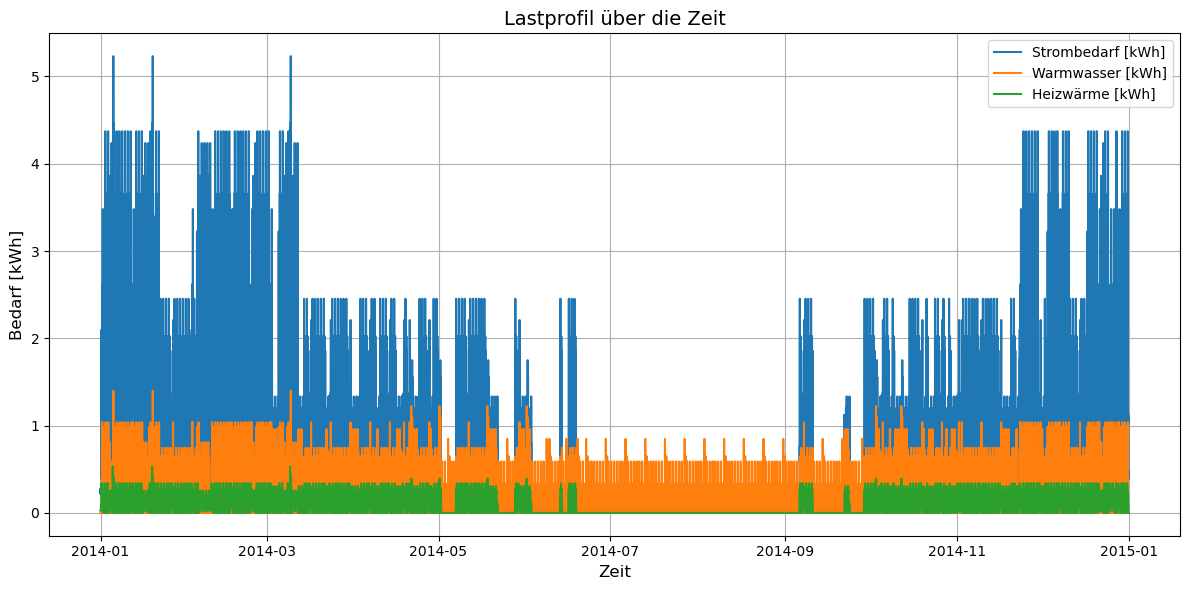

In [52]:
import matplotlib.pyplot as plt


# Plot erstellen
plt.figure(figsize=(12, 6))

# Einzelne Spalten plotten
plt.plot(lastprofil['Strombedarf [kWh]'], label='Strombedarf [kWh]')
plt.plot(lastprofil['Warmwasser [kWh]'], label='Warmwasser [kWh]')
plt.plot(lastprofil['Heizwärme [kWh]'], label='Heizwärme [kWh]')

# Diagramm anpassen
plt.title('Lastprofil über die Zeit', fontsize=14)
plt.xlabel('Zeit', fontsize=12)
plt.ylabel('Bedarf [kWh]', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


### WP UND SPEICHER DIMENSIONIERUNG NACH DIN 4645
1. Notwendige Heizleistung der WP
2. Wärmespeicher Dimensionierung - vereinfacht
3. Erforderliche Heizleistung der WP (WP Größe)

In [53]:
# Heizenergiebedarf
# Heizlast 
heizlast_j

# Sperrdauer pro Tag ist max. 2 Stunden & Leistungsdrosselung auf mind. 4,2 kW
sperrdauer = 2 # h
d = 24 # Periode 24 h

# Energiemenge für die Raumheizung über 24 h
Q_heiz_tag = heizlast_j*d/1000 # kWh
Q_heiz_tag

216.0

In [54]:
Q_twe_tag = tagesenergiebedarf.iloc[2].mean()
print(Q_twe_tag)
Q_twe_gesamt = lastprofil['Warmwasser [kWh]'].mean()
Q_twe_gesamt

4.450646557488274


0.042808219178082176

In [55]:
# Bestimmung des Speichervolumens nach DIN 4645: K2.1.1 direkte Speicherung von erwärmtem Trinkwasser
# Trinkwarmwasserbedarf
# Zapf Profil aus Tabelle J3 (DIN 4645) ausgewählt: 3 Familienmitglieder inkl. Baden & Düschen
# Die Bezugsperiode, die den größten Energiebedarf aufweist, ist der Zeitraum von 20:30 Uhr bis 21:30 Uhr.  
# In diesem Zeitraum werden für jede Wohneinheit 2,24 kWh für die Trinkwassererwärmung benötigt.

Q_twe_beszugsperiode = 2.24 # kWh

# Über den gesamten Tag sind 5,845 kWh notwendig.
Q_twe_tag = 5.845 # kWh

# Oder aus berechnete TWE 
Q_twe_tag = tagesenergiebedarf.iloc[2].mean()

# TWE Speichervolumen
T_frischwasser = 10 # Annahme Frischwasser Temperatur 
c_wasser = 1.163 # Wh/LK - spezifische Wärmekapazität
T_speicher_soll = 60 # °C

# Speichervolumen für Bezugsperiode
V_twe_bezugsperiode = Q_twe_beszugsperiode*1000/(c_wasser*(T_speicher_soll-T_frischwasser)) # l

# Aufschlag für die Annahme von Durchmischungsverlusten bei der Speicherung des Trinkwassers 
# mit f_twe = 1,15 für 15 %  Durchmischungsverlust bei der Speicherung des Trinkwassers 
# und f_twe = 1,20 für 15 % Durchmischungsverlusten und 5 % Aufschlag für die Wärmeübertragung bei der Speicherung des Heizwassers
f_twe = 1.2

# erforderliches Speichervolumen
V_twe_min = V_twe_bezugsperiode*f_twe
round(V_twe_min)

46

In [56]:
# Wahl der WP
Q_heiz_tag
Q_twe_tag
d
sperrdauer

# erforderliche Wärmepumpenleistung in kW
Q_punkt_wp_min = (Q_heiz_tag+Q_twe_tag)/(d-sperrdauer)
round(Q_punkt_wp_min)

10

In [57]:
# Dimensionierung von Speichern zur Sicherstellung eines störungsfreien Betriebs

# Mindestlaufzeit
# Im ersten Fall soll der Speicher unabhängig von den Betriebsbedingungen der Heizungsanlage 
# sowohl die erforderliche Mindestlaufzeit sicherstellen als auch die benötigte Energie zur Abtauung der Wärmepumpe mit Kreislaufumkehr bereitstellen.

mindestlaufzeit = 3/60 # h -  Kompressormindestlaufzeit bei Vaillant Wärmepumpen https://www.vaillant.ch/downloads/planungsinformationen/berechnungsbeispiel-planungsmodul-waermepumpen-1782511.pdf
T_delta = 5 # zulässige Temperaturerhöhung - für Auslegungsvorlauftemperaturen von 55°C zulässige Temperaturerhöhung von 5  K 
## 20 K für Auslegungsvorlauftemperaturen von 35 °C 
dichte = 1 # kg/l 
V_mindestlaufzeit = Q_punkt_wp_min*1000*mindestlaufzeit/(dichte*c_wasser*T_delta)

# Abtauung
t_abtauung = 10/60 # h
COP_abtauung = 5
T_delta_abtauung = 55-20
V_abtauung = Q_punkt_wp_min*1000*t_abtauung*(COP_abtauung-1)/(dichte*c_wasser*T_delta_abtauung*COP_abtauung)
V_abtauung

V_sp_min = V_mindestlaufzeit+V_abtauung
V_sp_min

118.98375879232987

In [58]:
# Speichervolumen - Verenfachte Methode
# 20 l/kW Leistung in Auslegungspunkt

V_sp_einfach = 20 * heizlast_j/1000 # l
V_sp_einfach

180.0

In [59]:
# Ergebnisse
print(f"Ergebnisse für den PLZ '{plz}' in der TRY Region '{TRY_region}' & Baujahr '{baujahr}'")
print(' - Heizlast: ', heizlast_j/1000, ' kW')
print(' - Heizbedarf für 1 Tag: ', Q_heiz_tag, ' kWh')
print(' - Warmwasserwärmebedarf für 1 Tag: ', Q_twe_tag, 'kWh')
print(' - WP mindest Größe:', round(Q_punkt_wp_min),' kW')
print(' - Pufferspeichergröße min: ', round(V_sp_min), 'l')
row_mean = tagesenergiebedarf.iloc[2].mean()
row_mean

Ergebnisse für den PLZ '40599' in der TRY Region '5' & Baujahr 'Nach 2002'
 - Heizlast:  9.0  kW
 - Heizbedarf für 1 Tag:  216.0  kWh
 - Warmwasserwärmebedarf für 1 Tag:  4.450646557488274 kWh
 - WP mindest Größe: 10  kW
 - Pufferspeichergröße min:  119 l


4.450646557488274

### WP Leistung und Speicher Ladezustand

1. Heizleistung pro Stunde berechnen
2. Pufferspeicher berücksichtigen 

In [60]:
# Heizleistung aus Heizwärmebedarf

# Resample pro Stunde 
lastprofil_h = lastprofil.resample('1h').sum()
lastprofil_h

,Strombedarf [kWh],Warmwasser [kWh],Heizwärme [kWh]
Zeit,,,
2014-01-01 00:00:00,1.004095,0.000000,0.108202
2014-01-01 01:00:00,0.952944,0.000000,0.172076
2014-01-01 02:00:00,1.017608,0.000000,0.233281
2014-01-01 03:00:00,1.004150,0.000000,0.283928
2014-01-01 04:00:00,0.983618,0.000000,0.267482
...,...,...,...
2014-12-31 19:00:00,4.549527,0.041807,0.786108
2014-12-31 20:00:00,4.409512,0.000000,0.630175
2014-12-31 21:00:00,4.250001,0.000000,0.316401


In [61]:
lastprofil_h[0:23].sum()

Strombedarf [kWh]    81.084834
Warmwasser [kWh]      5.225824
Heizwärme [kWh]      17.031649
dtype: float64

In [62]:
csv_tamb = 'C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\T_amb_40599_2014.csv'
t_amb = pd.read_csv(csv_tamb)
t_amb.set_index('time', inplace=True)
t_amb 

,temp
time,
2014-01-01 00:00:00,6.3
2014-01-01 01:00:00,5.0
2014-01-01 02:00:00,5.1
2014-01-01 03:00:00,5.5
2014-01-01 04:00:00,5.7
...,...
2014-12-31 19:00:00,1.9
2014-12-31 20:00:00,1.4
2014-12-31 21:00:00,1.1


In [63]:
# COP Berechnen

# COP ablesen
excel_wp = 'C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\Inputs\\Vaillant_aroTHERM plus_3.5-12.5 kW.xlsx'
wp_inputs = pd.read_excel(excel_wp)

wp_inputs

,Heizleistung [kW],Name,Heizleistung A-7/W35,Elektr. Leistung A-7/W35,COP A-7/W35,Heizleistung A2/W35,Elektr. Leistung A2/W35,COP A2/W35,Heizleistung A7/W35,Elektr. Leistung A7/W35,...,Heizleistung A7/W45,Elektr. Leistung A7/W45,COP A7/W45,Heizleistung A7/W55,Elektr. Leistung A7/W55,COP A7/W55,Hiezleistung A7/W65,Elektr. Leistung A7/W65,COP A7/W65,Pumpen-Volumenstrom bei 5K [l/h]
0,3.5,VWL 35/6 A,3.6,1.55,2.2,2.0,0.51,3.9,3.3,0.69,...,3.1,0.850,3.6,4.8,1.71,2.8,4.5,1.96,2.3,580
1,5.5,VWL 55/6 A,5.4,2.08,2.6,2.0,0.51,3.9,3.4,0.71,...,3.1,0.860,3.6,4.8,1.71,2.8,4.5,1.96,2.3,580
2,7.5,VWL 75/6 A,7.0,2.50,2.8,3.1,0.76,4.1,4.6,0.96,...,4.2,1.117,3.6,5.0,1.72,2.9,6.3,2.74,2.3,790
3,10.5,VWL 105/6 A,9.2,3.41,2.7,5.8,1.26,4.6,8.1,1.53,...,8.1,2.940,3.1,9.1,2.94,3.1,11.4,4.96,2.3,1418
4,12.5,VWL 125/6 A,12.2,4.52,2.7,5.9,1.28,4.6,8.5,1.57,...,8.1,2.940,3.1,9.1,2.94,3.1,11.4,4.96,2.3,1480


In [64]:
# COP Dictionary

import pandas as pd

COP_35 = pd.DataFrame({'35':[2.2, 3.9, 4.8, 5.3], 
                    '45':[None, None, 3.6, None], 
                    '55':[None, None, 2.8, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_35.index.name = 'T_aussenluft'

COP_55 = pd.DataFrame({'35':[2.6, 3.9, 4.8, 5.3], 
                    '45':[None, None, 3.6, None], 
                    '55':[None, None, 2.8, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_55.index.name = 'T_aussenluft'

COP_75 = pd.DataFrame({'35':[2.8, 4.1, 4.8, 5.2], 
                    '45':[None, None, 3.6, None], 
                    '55':[None, None, 2.9, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_75.index.name = 'T_aussenluft'


COP_105 = pd.DataFrame({'35':[2.7, 4.6, 5.3, 5.3], 
                    '45':[None, None, 3.1, None], 
                    '55':[None, None, 3.1, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_105.index.name = 'T_aussenluft'

COP_125 = pd.DataFrame({'35':[2.7, 4.6, 5.4, 5.7], 
                    '45':[None, None, 3.1, None], 
                    '55':[None, None, 3.1, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_125.index.name = 'T_aussenluft'

COP = {
    'Vaillant 3.5': COP_35,
    'Vaillant 5.5': COP_55,
    'Vaillant 7.5': COP_75,
    'Vaillant 10.5': COP_105,
    'Vaillant 12.5': COP_125,
}

COP['Vaillant 10.5']

,35,45,55,65
T_aussenluft,,,,
-7,2.7,NaN,NaN,NaN
2,4.6,NaN,NaN,NaN
7,5.3,3.1,3.1,2.3
10,5.3,NaN,NaN,NaN


### Heizkurve, Interpolation COP & P_el

In [65]:
# HEIZKURVE 

import matplotlib.pyplot as plt
import numpy as np

# T_aussen + Datum
heizkennlinie = pd.read_csv('C:\\Users\\DianaEspinosaLozano\\Desktop\\Thesis\\T_amb_40599_2016.csv')

if baujahr == ('ab 2009', 'KfW 85', 'KfW 70', 'KfW 55', 'KfW 40','Passivhaus'):
    art = 'Fußbodenheizung'
    T_n_vor = 35
    T_n_rueck = 28
    T_soll = 20
    p = 1.1
    T_m_n_ueber = (T_n_vor-T_n_rueck)/(np.log((T_n_vor-T_soll)/(T_n_rueck-T_soll)))
else:
    art = 'Heizkörper'
    T_n_vor = 55
    T_n_rueck = 45
    T_soll = 20
    p = 1.3
    T_m_n_ueber = (T_n_vor-T_n_rueck)/(np.log((T_n_vor-T_soll)/(T_n_rueck-T_soll)))

# Lastverhältnis phi
t_amb['Lastverhältnis'] = np.divide(T_soll-t_amb['temp'], T_soll-T_n_aussen)

#e^x
t_amb['e^x'] = np.exp(np.divide((t_amb['Lastverhältnis']**(p-1/p))*(T_n_vor-T_n_rueck), T_m_n_ueber))

# Vorlauftemperatur: T_vor [°C]
t_amb['T_vor'] = np.divide(t_amb['e^x']*((T_n_vor-T_n_rueck)*t_amb['Lastverhältnis']+T_soll)-T_soll, t_amb['e^x']-1)

# Rücklauftemperatur: T_rueck [°C]
t_amb['T_rueck'] = t_amb['T_vor']-t_amb['Lastverhältnis']*(T_n_vor-T_n_rueck)

t_amb

,temp,Lastverhältnis,e^x,T_vor,T_rueck
time,,,,,
2014-01-01 00:00:00,6.3,0.492806,1.260006,43.881684,38.953627
2014-01-01 01:00:00,5.0,0.539568,1.274443,45.056198,39.660515
2014-01-01 02:00:00,5.1,0.535971,1.273348,44.967379,39.607667
2014-01-01 03:00:00,5.5,0.521583,1.268943,44.609629,39.393802
2014-01-01 04:00:00,5.7,0.514388,1.266725,44.429232,39.285347
...,...,...,...,...,...
2014-12-31 19:00:00,1.9,0.651079,1.307264,47.700356,41.189565
2014-12-31 20:00:00,1.4,0.669065,1.312377,48.109164,41.418517
2014-12-31 21:00:00,1.1,0.679856,1.315423,48.352353,41.553792


In [66]:
# COP INTERPOLATION

# COP Dictionary
COP_6 = pd.DataFrame({'35':[1.5, 2.3, 2.5, 2.6, 2.6, 3.3, 3.6], 
                    '45':[1.6, 1.8, 2, 2.2, 2.3, 2.9, 3.3], 
                    '55':[1.4, 1.6, 1.7, 1.9, 2.1, 2.5, 2.7], 
                    '65':[None, None, None, None, None, None, None]}, 
                    index = ['-20', '-15', '-10', '-5', '0', '5', '7'])
COP_6.index.name = 'T_aussenluft'

COP_55 = pd.DataFrame({'35':[2.6, 3.9, 4.8, 5.3], 
                    '45':[None, None, 3.6, None], 
                    '55':[None, None, 2.8, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_55.index.name = 'T_aussenluft'

COP_75 = pd.DataFrame({'35':[2.8, 4.1, 4.8, 5.2], 
                    '45':[None, None, 3.6, None], 
                    '55':[None, None, 2.9, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_75.index.name = 'T_aussenluft'


COP_105 = pd.DataFrame({'35':[2.7, 4.6, 5.3, 5.3], 
                    '45':[None, None, 3.1, None], 
                    '55':[None, None, 3.1, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_105.index.name = 'T_aussenluft'

COP_125 = pd.DataFrame({'35':[2.7, 4.6, 5.4, 5.7], 
                    '45':[None, None, 3.1, None], 
                    '55':[None, None, 3.1, None], 
                    '65':[None, None, 2.3, None]}, 
                    index = ['-7', '2', '7', '10'])
COP_125.index.name = 'T_aussenluft'

COP = {
    'Nebo F2040-6': COP_6,
#     'Vaillant 5.5': COP_55,
#     'Vaillant 7.5': COP_75,
#     'Vaillant 10.5': COP_105,
#     'Vaillant 12.5': COP_125,'
}

COP['Nebo F2040-6']


,35,45,55,65
T_aussenluft,,,,
-20,1.5,1.6,1.4,None
-15,2.3,1.8,1.6,None
-10,2.5,2.0,1.7,None
-5,2.6,2.2,1.9,None
0,2.6,2.3,2.1,None
5,3.3,2.9,2.5,None
7,3.6,3.3,2.7,None


In [67]:
import pandas as pd
import numpy as np
from scipy.interpolate import RegularGridInterpolator

# Ursprünglicher DataFrame (COP_6) mit expliziten NaN-Werten für fehlende Werte
COP_6 = pd.DataFrame({'35':[1.5, 2.3, 2.5, 2.6, 2.6, 3.3, 3.6], 
                    '45':[1.6, 1.8, 2, 2.2, 2.3, 2.9, 3.3], 
                    '55':[1.4, 1.6, 1.7, 1.9, 2.1, 2.5, 2.7]},
                    index = ['-20', '-15', '-10', '-5', '0', '5', '7'])
COP_6.index.name = 'T_aussenluft'

def bilinear_interpolate(df):
    # Erstellen einer erweiterten Temperaturreihe
    extended_x = np.arange(-20, 7.5, 0.5)  # Außentemperaturen von -20 bis 15 in Schritten von 0.5
    extended_y = np.arange(35, 55.5, 0.5)    # Wassertemperaturen von 35 bis 55 in Schritten von 0.5
    
    # Extrahieren der bekannten Außentemperaturen (Index) und Wassertemperaturen (Spaltennamen)
    x = df.index.astype(float)  # Außentemperaturen (Index)
    y = df.columns.astype(float)  # Wassertemperaturen (Spalten)

    # Erstellen einer bilinearen Interpolationsfunktion mit RegularGridInterpolator
    interpolator = RegularGridInterpolator((x, y), df.values, method='linear', fill_value=None)

    # Erstellen eines neuen DataFrames mit den erweiterten Temperaturwerten
    extended_df = pd.DataFrame(index=extended_x, columns=extended_y)

    # Interpolierte Werte berechnen und in das DataFrame einfügen
    for i, xi in enumerate(extended_x):
        for j, yi in enumerate(extended_y):
            # Überprüfen, ob der Wert innerhalb des gültigen Bereichs liegt
            # Sicherstellen, dass wir nur Werte innerhalb des ursprünglichen Datenbereichs verwenden
            xi_clipped = np.clip(xi, min(x), max(x))  # Begrenzen der Außentemperatur im Bereich von x
            yi_clipped = np.clip(yi, min(y), max(y))  # Begrenzen der Wassertemperatur im Bereich von y
            
            # Berechnung der interpolierten Werte
            extended_df.iloc[i, j] = interpolator((xi_clipped, yi_clipped)).round(2)  # Interpolation durchführen

    return extended_df

# Anwenden der Interpolation auf den COP_6 DataFrame
interpolated_df = bilinear_interpolate(COP_6)

# Ausgabe des interpolierten DataFrames
print("Interpolierter DataFrame mit erweiterten Werten:")
print(interpolated_df)

Interpolierter DataFrame mit erweiterten Werten:
       35.0  35.5  36.0  36.5  37.0  37.5  38.0  38.5  39.0  39.5  ...  50.5  \
-20.0   1.5   1.5  1.51  1.52  1.52  1.52  1.53  1.54  1.54  1.55  ...  1.49   
-19.5  1.58  1.58  1.58  1.59  1.59  1.59  1.59  1.59   1.6   1.6  ...  1.51   
-19.0  1.66  1.66  1.66  1.66  1.66  1.66  1.65  1.65  1.65  1.65  ...  1.53   
-18.5  1.74  1.74  1.73  1.73  1.72  1.72  1.72  1.71  1.71   1.7  ...  1.55   
-18.0  1.82  1.81  1.81   1.8  1.79  1.78  1.78  1.77  1.76  1.76  ...  1.57   
-17.5   1.9  1.89  1.88  1.87  1.86  1.85  1.84  1.83  1.82  1.81  ...  1.59   
-17.0  1.98  1.97  1.95  1.94  1.93  1.92   1.9  1.89  1.88  1.86  ...  1.61   
-16.5  2.06  2.04  2.03  2.01   2.0  1.98  1.96  1.95  1.93  1.92  ...  1.63   
-16.0  2.14  2.12   2.1  2.08  2.06  2.04  2.03  2.01  1.99  1.97  ...  1.65   
-15.5  2.22   2.2  2.18  2.15  2.13  2.11  2.09  2.07  2.04  2.02  ...  1.67   
-15.0   2.3  2.27  2.25  2.22   2.2  2.17  2.15  2.12   2.1  2.08  ... 

In [68]:
interpolated_df

,35.0,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,...,50.5,51.0,51.5,52.0,52.5,53.0,53.5,54.0,54.5,55.0
-20.0,1.5,1.5,1.51,1.52,1.52,1.52,1.53,1.54,1.54,1.55,...,1.49,1.48,1.47,1.46,1.45,1.44,1.43,1.42,1.41,1.4
-19.5,1.58,1.58,1.58,1.59,1.59,1.59,1.59,1.59,1.6,1.6,...,1.51,1.5,1.49,1.48,1.47,1.46,1.45,1.44,1.43,1.42
-19.0,1.66,1.66,1.66,1.66,1.66,1.66,1.65,1.65,1.65,1.65,...,1.53,1.52,1.51,1.5,1.49,1.48,1.47,1.46,1.45,1.44
-18.5,1.74,1.74,1.73,1.73,1.72,1.72,1.72,1.71,1.71,1.7,...,1.55,1.54,1.53,1.52,1.51,1.5,1.49,1.48,1.47,1.46
-18.0,1.82,1.81,1.81,1.8,1.79,1.78,1.78,1.77,1.76,1.76,...,1.57,1.56,1.55,1.54,1.53,1.52,1.51,1.5,1.49,1.48
-17.5,1.9,1.89,1.88,1.87,1.86,1.85,1.84,1.83,1.82,1.81,...,1.59,1.58,1.57,1.56,1.55,1.54,1.53,1.52,1.51,1.5
-17.0,1.98,1.97,1.95,1.94,1.93,1.92,1.9,1.89,1.88,1.86,...,1.61,1.6,1.59,1.58,1.57,1.56,1.55,1.54,1.53,1.52
-16.5,2.06,2.04,2.03,2.01,2.0,1.98,1.96,1.95,1.93,1.92,...,1.63,1.62,1.61,1.6,1.59,1.58,1.57,1.56,1.55,1.54
-16.0,2.14,2.12,2.1,2.08,2.06,2.04,2.03,2.01,1.99,1.97,...,1.65,1.64,1.63,1.62,1.61,1.6,1.59,1.58,1.57,1.56
-15.5,2.22,2.2,2.18,2.15,2.13,2.11,2.09,2.07,2.04,2.02,...,1.67,1.66,1.65,1.64,1.63,1.62,1.61,1.6,1.59,1.58


In [69]:
# COP zuweisen - T_amb und T_vorlauf

# Initialize the result list for COPs
t_amb['COP'] = None

# Iterate over rows in t_amb to find the closest COP for each row
for i, row in t_amb.iterrows():
    temp = row['temp']
    T_vor = row['T_vor']
    
    # Initialize variables to find the closest point
    naechster_cop = None
    kleinster_abstand = float('inf')  # Start with an infinitely large distance
    
    # Iterate over interpolated_df index (ambient temp) and columns (water temp)
    for x in interpolated_df.index:
        for y in interpolated_df.columns:
            abstand = abs(x - temp) + abs(y - T_vor)  # Combined distance
            
            # Update if the current distance is the smallest
            if abstand < kleinster_abstand:
                kleinster_abstand = abstand
                naechster_cop = interpolated_df.loc[x, y]
    
    # Assign the closest COP value to the current row
    t_amb.at[i, 'COP'] = naechster_cop

t_amb

,temp,Lastverhältnis,e^x,T_vor,T_rueck,COP
time,,,,,,
2014-01-01 00:00:00,6.3,0.492806,1.260006,43.881684,38.953627,3.23
2014-01-01 01:00:00,5.0,0.539568,1.274443,45.056198,39.660515,2.9
2014-01-01 02:00:00,5.1,0.535971,1.273348,44.967379,39.607667,2.9
2014-01-01 03:00:00,5.5,0.521583,1.268943,44.609629,39.393802,3.02
2014-01-01 04:00:00,5.7,0.514388,1.266725,44.429232,39.285347,3.02
...,...,...,...,...,...,...
2014-12-31 19:00:00,1.9,0.651079,1.307264,47.700356,41.189565,2.47
2014-12-31 20:00:00,1.4,0.669065,1.312377,48.109164,41.418517,2.4
2014-12-31 21:00:00,1.1,0.679856,1.315423,48.352353,41.553792,2.34


In [70]:
# P_el = P_th / COP

t_amb['P_th'] = lastprofil_h['Heizwärme [kWh]']+lastprofil_h['Warmwasser [kWh]']
t_amb['P_el'] = t_amb['P_th']/t_amb['COP']
t_amb['Heizwärme Theoretisch'] = t_amb['Lastverhältnis']*Q_punkt_wp_min
t_amb

,temp,Lastverhältnis,e^x,T_vor,T_rueck,COP,P_th,P_el,Heizwärme Theoretisch
time,,,,,,,,,
2014-01-01 00:00:00,6.3,0.492806,1.260006,43.881684,38.953627,3.23,0.108202,0.033499,4.938152
2014-01-01 01:00:00,5.0,0.539568,1.274443,45.056198,39.660515,2.9,0.172076,0.059337,5.406736
2014-01-01 02:00:00,5.1,0.535971,1.273348,44.967379,39.607667,2.9,0.233281,0.080442,5.370691
2014-01-01 03:00:00,5.5,0.521583,1.268943,44.609629,39.393802,3.02,0.283928,0.094016,5.226511
2014-01-01 04:00:00,5.7,0.514388,1.266725,44.429232,39.285347,3.02,0.267482,0.08857,5.154422
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,1.9,0.651079,1.307264,47.700356,41.189565,2.47,0.827915,0.335188,6.524128
2014-12-31 20:00:00,1.4,0.669065,1.312377,48.109164,41.418517,2.4,0.630175,0.262573,6.704353
2014-12-31 21:00:00,1.1,0.679856,1.315423,48.352353,41.553792,2.34,0.316401,0.135214,6.812487


<Axes: xlabel='time'>

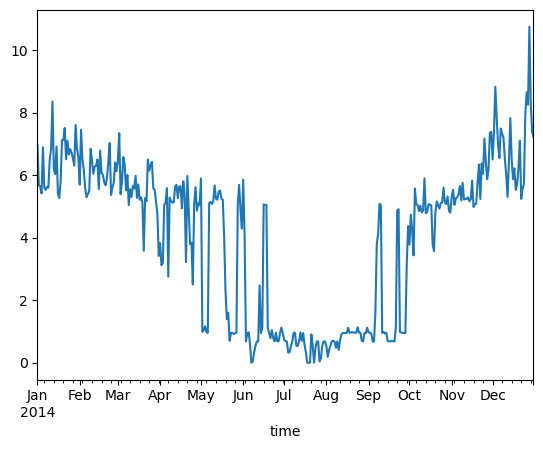

In [71]:
import matplotlib.pyplot as plt

t_amb.index = pd.to_datetime(t_amb.index)
p_resampled = t_amb['P_el'].resample('D').sum()
p_resampled.plot()

In [72]:
p_resampled.sum()

1470.0272439868593

In [82]:
# Heizwärme Auslegung - Kennlinie 
# T_aussen -> von T_norm_aussen bis T_max (15°C)
# Norm Heizbedarf verteilt 

import pandas as pd
import numpy as np

# Beispielwerte
end_temp = 15  # Endwert der Temperatur
step = 0.1  # Schrittweite

# Index erstellen
index = np.arange(T_n_aussen, end_temp + step, step)

# Heizwärme Auslegung berechnen
length = len(index)
heizwaerme_auslegung = Q_punkt_wp_min - (np.arange(length) / (length - 1)) * Q_punkt_wp_min
lastverhaeltnis = np.divide(T_soll-index, T_soll-T_n_aussen)
heizwaerme_theoretisch = lastverhaeltnis*Q_punkt_wp_min

# DataFrame erstellen
auslegungs_heizleistung = pd.DataFrame({
    'T_aussen': index,
    'Lastverhältnis': lastverhaeltnis,
    'Heizwärme Auslegung': heizwaerme_auslegung,
    'Heizwärme Theoretisch': heizwaerme_theoretisch
}, index=index)

# Optional: T_aussen-Spalte entfernen, da diese im Index enthalten ist
auslegungs_heizleistung.drop(columns='T_aussen', inplace=True)

auslegungs_heizleistung

,Lastverhältnis,Heizwärme Auslegung,Heizwärme Theoretisch
-7.8,1.000000,10.020484,10.020484
-7.7,0.996403,9.976534,9.984439
-7.6,0.992806,9.932585,9.948394
-7.5,0.989209,9.888635,9.912349
-7.4,0.985612,9.844686,9.876304
...,...,...,...
14.6,0.194245,0.175798,1.946425
14.7,0.190647,0.131848,1.910380
14.8,0.187050,0.087899,1.874335
14.9,0.183453,0.043949,1.838290


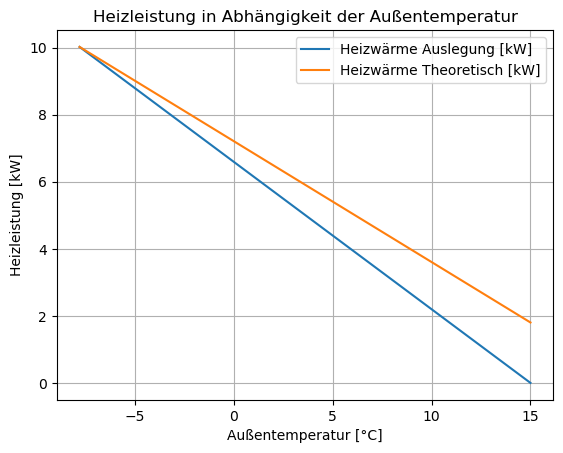

In [88]:
plt.plot(auslegungs_heizleistung['Heizwärme Auslegung'], label = 'Heizwärme Auslegung [kW]')
plt.plot(auslegungs_heizleistung['Heizwärme Theoretisch'], label = 'Heizwärme Theoretisch [kW]')

plt.xlabel('Außentemperatur [°C]')
plt.ylabel('Heizleistung [kW]')
plt.title('Heizleistung in Abhängigkeit der Außentemperatur')
plt.grid(True)
plt.legend()
plt.show()
